In [5]:
## import the necessary lib
import pandas as pd
import numpy as np

In [6]:
## take a the data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_data.shape

(891, 12)

In [9]:
train_data=train_data.set_index("PassengerId")
test_data=test_data.set_index("PassengerId")

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
# look at the median of Age
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

In [13]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.0000,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.0000,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699113,14.526507,0.4167,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0000,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0000,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0000,7.9104,14.4542,31.0,512.3292


In [14]:
columns=["Survived","Pclass","Sex","Embarked"]

for i in columns:
    print(train_data[i].value_counts())
    print("*****************************")

Survived
0    549
1    342
Name: count, dtype: int64
*****************************
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
*****************************
Sex
male      577
female    314
Name: count, dtype: int64
*****************************
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
*****************************


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("scaler",StandardScaler())
])

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Categorical features to Numerical features
cat_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("cat_encoder",OneHotEncoder(sparse=False))

])

In [24]:
from sklearn.compose import ColumnTransformer

In [26]:
# ColumnTransformer essentially combines two different operations that apply different transformation operations to numeric and categorical columns

from sklearn.compose import ColumnTransformer

num_attribs=["Age","SibSp","Parch","Fare"]
cat_attribs=["Pclass","Sex","Embarked"]

preproces_pipeline=ColumnTransformer([
    
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs),
    
])


In [27]:
X_train=preproces_pipeline.fit_transform(train_data[num_attribs + cat_attribs])



/Users/mac/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
y_train=train_data["Survived"]

## Random Forest Classifier Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(n_estimators=100,random_state=42)

forest_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [30]:
X_test=preproces_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred_forest=forest_clf.predict(X_test)

In [31]:
pd.DataFrame(y_pred_forest,columns=['pred_Forest'])

,pred_Forest
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [32]:
from sklearn.model_selection import cross_val_score

forest_score=cross_val_score(forest_clf,X_train,y_train,cv=10)
forest_score.mean()

0.8048064918851436

## Support Vector Classifier Model

In [33]:
from sklearn.svm import SVC

svc_clf=SVC(gamma="auto")
svc_score=cross_val_score(svc_clf,X_train,y_train,cv=10)
svc_score.mean()

0.8238077403245943

In [34]:
svc_clf.fit(X_train,y_train)

SVC(gamma='auto')

### Here, we will measuring the score with  ***Cross_val_score***

In [35]:
svc_score=cross_val_score(svc_clf,X_train,y_train,cv=10)
svc_score.mean()

0.8238077403245943

### Here, we will find the best HyperParamters for SVC Model ***GridSearchCV***

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()

param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'poly', 'rbf'],
              'gamma': [0.001, 0.01, 0.1]}


grid_search=GridSearchCV(svc,param_grid,cv=10,scoring="accuracy")
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [37]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [38]:
grid_search.best_score_

0.8294257178526842

In [39]:
grid_search.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [41]:
svc=SVC(C= 10, gamma= 0.1, kernel= 'rbf')
svc.fit(X_train,y_train)

SVC(C=10, gamma=0.1)

In [42]:
svc_score=cross_val_score(svc_clf,X_train,y_train,cv=10)
svc_score.mean()    ## hmm, we find the same result wow . İt is interesing

0.8238077403245943

## SGDClassifier Model

In [43]:
from sklearn.linear_model import SGDClassifier


sgdc_clf=SGDClassifier(random_state=42)

sgdc_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [44]:
from sklearn.model_selection import cross_val_score

sgdc_score=cross_val_score(sgdc_clf,X_train,y_train,cv=10)
sgdc_score.mean()

0.750848938826467

## XGBoost Classifier Model

In [45]:
from xgboost import XGBClassifier

xgboost_clf=XGBClassifier()

xgboost_clf.fit(X_train,y_train)
xgboost_pred=xgboost_clf.predict(X_test)
xgboost_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
from sklearn.model_selection import cross_val_score
score_xgbosst=cross_val_score(xgboost_clf,X_train,y_train)

In [47]:
score_xgbosst.mean()

0.8182097796748478

## HyperParamtersw with GridSearchCV for the XGBoost

##### it will take the 10 minutes depending your hardware

In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgboost_clf=XGBClassifier()



param_grid = {
    "max_depth": [3, 4, 5],
    "n_estimators": [10,50, 100],
    "learning_rate": [0.01, 0.1, 0.2,1],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}


xgb_grid=GridSearchCV(xgboost_clf,param_grid,cv=5,scoring="accuracy")

xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'learning_rate': [0.01, 0.1, 0.2, 1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 5, 10],
                         'n_estimators': [10, 50, 100],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [49]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [50]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 50,
 'subsample': 0.8}

In [51]:
xgb_grid.best_score_

0.8507187244994036

In [52]:
xgboost_clf=XGBClassifier(learning_rate= 1, max_depth = 4, n_estimators = 50,colsample_bytree= 0.8, gamma= 0.5,min_child_weight= 5,subsample= 0.8)
xgboost_clf.fit(X_train,y_train)
xgbos_pred=xgboost_clf.predict(X_test)

In [81]:
xgbos_score=cross_val_score(xgboost_clf,X_train,y_train,cv=10)
xgbos_score

array([0.75555556, 0.84269663, 0.75280899, 0.84269663, 0.88764045,
       0.86516854, 0.87640449, 0.82022472, 0.79775281, 0.79775281])

In [84]:
xgbos_score.mean()

0.8238701622971286

## Let's plot the every Score of models

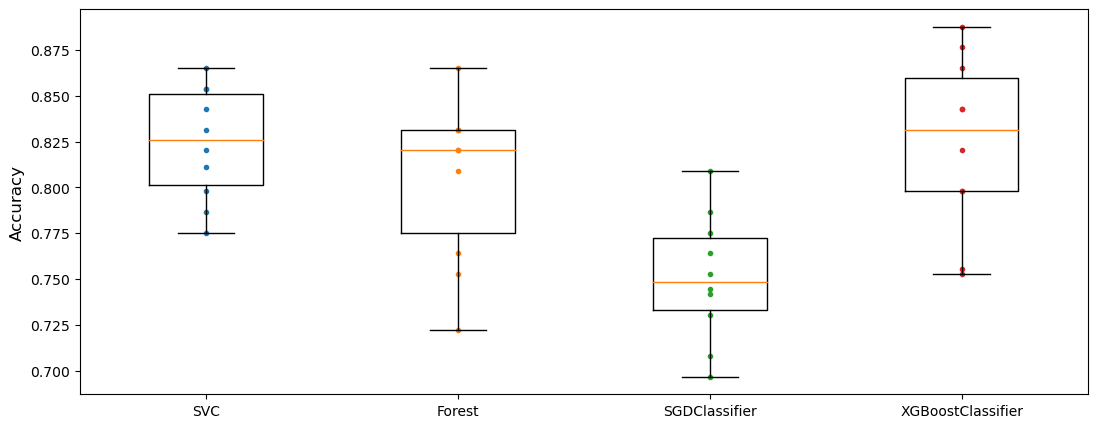

In [85]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,5))
plt.plot([1]*10,svc_score,".")
plt.plot([2]*10,forest_score,".")
plt.plot([3]*10,sgdc_score,".")
plt.plot([4]*10,xgbos_score,".")
plt.boxplot([svc_score,forest_score,sgdc_score,xgbos_score],labels=["SVC","Forest","SGDClassifier","XGBoostClassifier"])
plt.ylabel("Accuracy",fontsize=12)
plt.show()

## Prediction to CSV With XGBoost pred

In [58]:
test_csv=pd.read_csv("test.csv")

In [60]:
test_csv["Survived"]=xgbos_pred
sub=test_csv[["PassengerId","Survived"]]

In [64]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [86]:
sub.to_csv("submission.csv",index=False)

## The End